<a href="https://colab.research.google.com/github/ammarff/TUBES1_ML_Lanjut/blob/main/TPOT_Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install TPOT

In [177]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### import library

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from tpot import TPOTClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tpot import TPOTClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from google.colab import drive
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Eksplorasi Data

### Read dataset


In [179]:
df = pd.read_csv("https://raw.githubusercontent.com/ammarff/TUBES1_ML_Lanjut/main/train.csv", na_values='?')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [180]:
# Import Dataset test
!gdown --id 1NgsZJdi_JACZo0cIU5-XfbvhatL8rA2U

# Read test dataset
df_test = pd.read_csv("test.csv")

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NgsZJdi_JACZo0cIU5-XfbvhatL8rA2U
To: /content/test.csv
100% 23.3k/23.3k [00:00<00:00, 50.4MB/s]


### Data Info


In [181]:
# Menghitung banyaknya data yang ada pada dataset
print("Banyak Data : ",len(df))

Banyak Data :  463


In [182]:
# Menampilkan type data tiap fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       463 non-null    int64  
 1   diagnosis                463 non-null    object 
 2   radius_mean              463 non-null    float64
 3   texture_mean             463 non-null    float64
 4   perimeter_mean           463 non-null    float64
 5   area_mean                463 non-null    float64
 6   smoothness_mean          463 non-null    float64
 7   compactness_mean         463 non-null    float64
 8   concavity_mean           456 non-null    float64
 9   concave points_mean      456 non-null    float64
 10  symmetry_mean            463 non-null    float64
 11  fractal_dimension_mean   463 non-null    float64
 12  radius_se                463 non-null    float64
 13  texture_se               463 non-null    float64
 14  perimeter_se             4

### Pengisian Fitur


In [183]:
# Menghitung data yang bernilai tidak null pada suatu kolom
features_fill = pd.DataFrame(100 * df.count().sort_values() / df.shape[0])
features_fill.reset_index(inplace=True)
features_fill.columns = ['Features', 'Fill (%)']

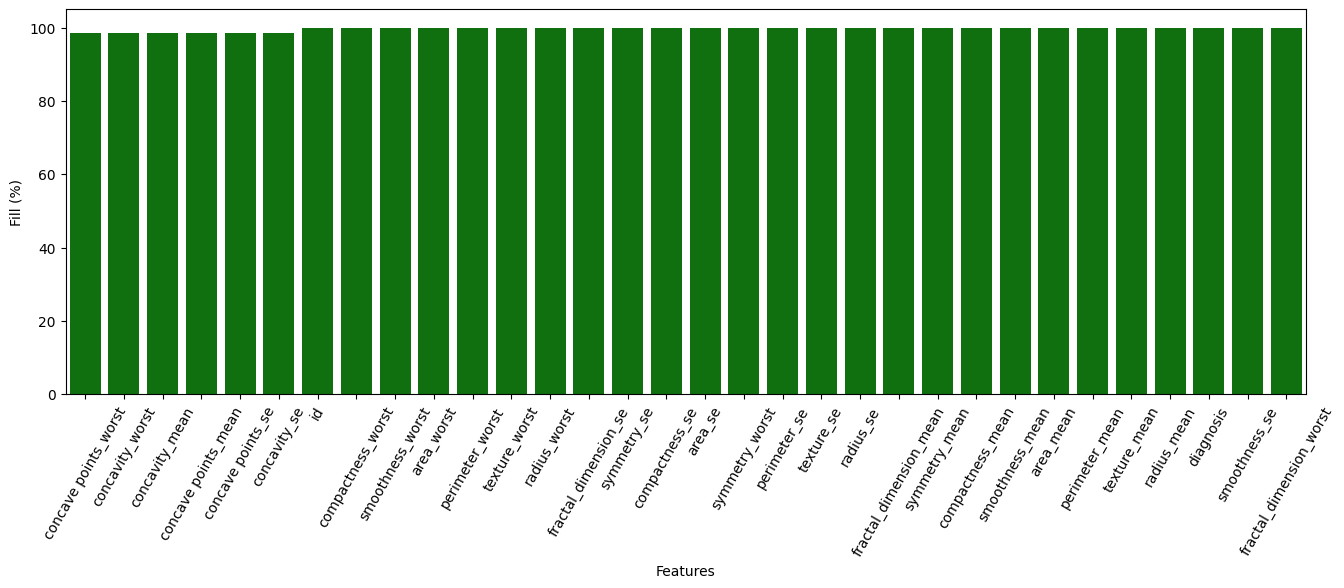

In [184]:
# Visualisasi banyak data yang tidak null pada suatu kolom dalam bentuk persen
plt.figure(figsize=(16, 5))
sns.barplot(x = 'Features', y = 'Fill (%)', data = features_fill, color = 'green')
plt.xticks(rotation=60)
plt.show()
     

In [185]:
# Menampilkan missing value 
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             7
concave points_mean        7
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               7
concave points_se          7
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            7
concave points_worst       7
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [186]:
#Data Kategorikal
print('Data berjenis Kategorikal')
df.select_dtypes('object').columns

Data berjenis Kategorikal


Index(['diagnosis'], dtype='object')

In [187]:
#Data Numerical
print('Data berjenis Numerical')
df.select_dtypes('float64').columns

Data berjenis Numerical


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Heatmap Correlation


<Axes: >

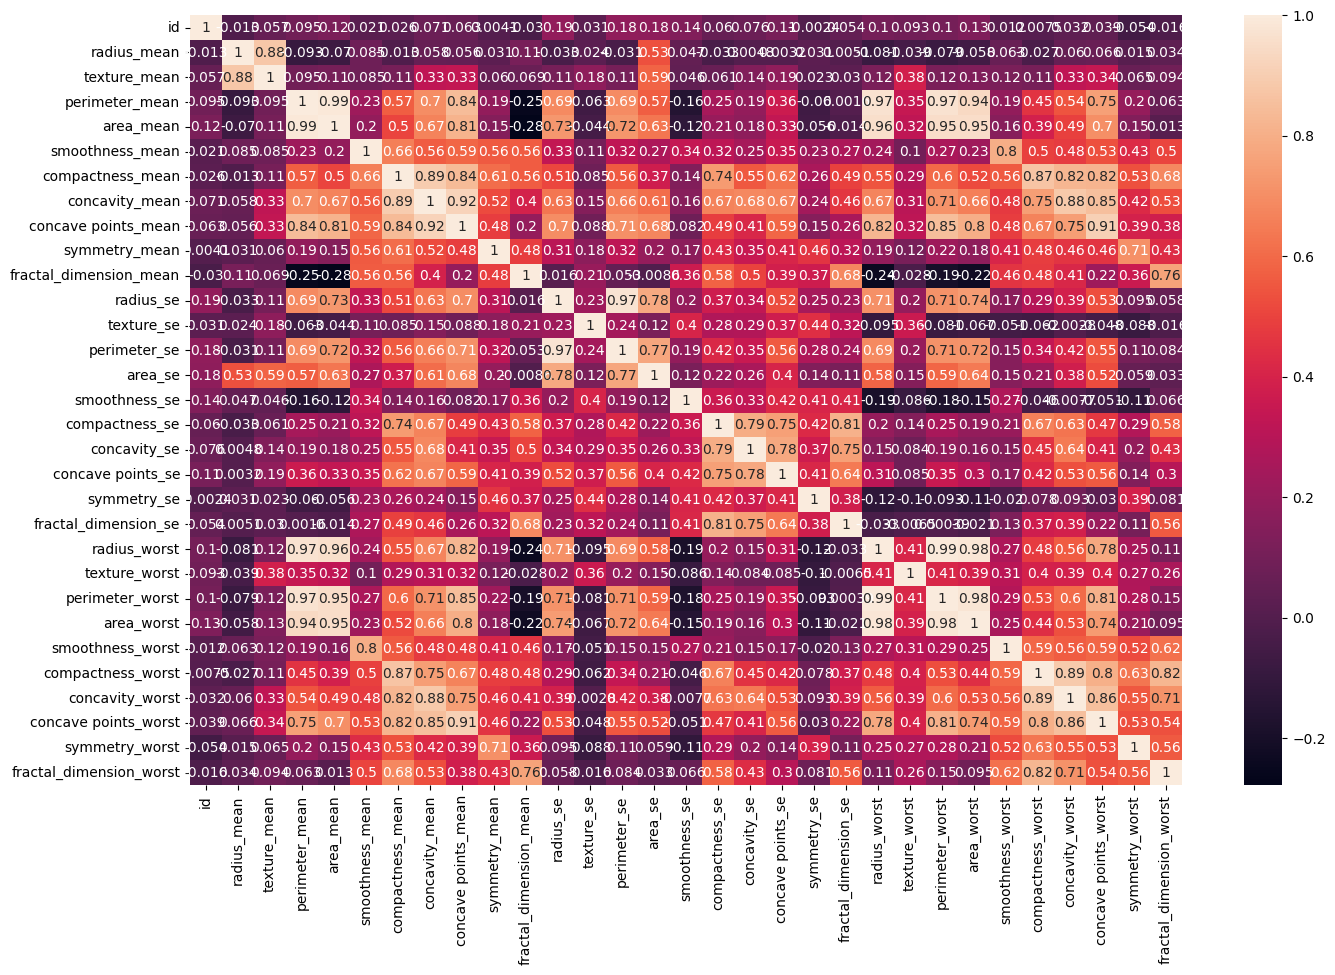

In [188]:
f, ax = plt.subplots(figsize=(16, 10))
RD = df.corr()
sns.heatmap(RD, ax=ax, annot=True)

# Preprocessing data

### Drop data yang tidak berkorelasi

In [189]:
df.drop(['concavity_mean'], axis=1, inplace=True)
df.drop(['concave points_mean'], axis=1, inplace=True)
df.drop(['concavity_se'], axis=1, inplace=True)
df.drop(['concave points_se'], axis=1, inplace=True)
df.drop(['concavity_worst'], axis=1, inplace=True)
df.drop(['concave points_worst'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    object 
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   symmetry_mean            463 non-null    float64
 8   fractal_dimension_mean   463 non-null    float64
 9   radius_se                463 non-null    float64
 10  texture_se               463 non-null    float64
 11  perimeter_se             463 non-null    float64
 12  area_se                  463 non-null    float64
 13  smoothness_se            463 non-null    float64
 14  compactness_se           4

### Duplikat data


In [190]:
# Copy dataframe
df_drop = df.copy()

# Drop data yang redundan
df_drop = df_drop.drop_duplicates()

# Reset index
df_drop.reset_index(drop=True, inplace=True)
data = df_drop
df_drop

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.1667,0.05449,0.2621,...,0.01215,0.001514,14.34,31.88,91.06,628.5,0.1218,0.1093,0.2306,0.06291
459,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.1621,0.05952,0.1781,...,0.01574,0.002268,10.67,36.92,68.03,349.9,0.1110,0.1109,0.2321,0.07211
460,M,17.080,27.15,111.20,930.9,0.09898,0.11100,0.1793,0.06281,0.9291,...,0.02045,0.004417,22.96,34.49,152.10,1648.0,0.1600,0.2444,0.3010,0.09060
461,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.2061,0.05623,2.5470,...,0.01697,0.004558,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.2641,0.07427


### Data Object To Numeric

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    object 
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   symmetry_mean            463 non-null    float64
 8   fractal_dimension_mean   463 non-null    float64
 9   radius_se                463 non-null    float64
 10  texture_se               463 non-null    float64
 11  perimeter_se             463 non-null    float64
 12  area_se                  463 non-null    float64
 13  smoothness_se            463 non-null    float64
 14  compactness_se           4

In [192]:
data_object = ['diagnosis']
data_object

['diagnosis']

In [193]:
labelencoder = LabelEncoder()
for i in data_object:
  data[i] = data[i].astype(str)
  data[i] = labelencoder.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    int64  
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   symmetry_mean            463 non-null    float64
 8   fractal_dimension_mean   463 non-null    float64
 9   radius_se                463 non-null    float64
 10  texture_se               463 non-null    float64
 11  perimeter_se             463 non-null    float64
 12  area_se                  463 non-null    float64
 13  smoothness_se            463 non-null    float64
 14  compactness_se           4

### Handling Missing Value


In [194]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Outlier Data

In [195]:
print("jumlah data dengan outliers", data.shape)

# Drop outliers
data = data[(np.abs(stats.zscore(data.select_dtypes(include=np.number))) < 3).all(axis=1)]

print("jumlah data tanpa outliers", data.shape)

# Reset index
data.reset_index(drop=True, inplace=True)
data

jumlah data dengan outliers (463, 25)
jumlah data tanpa outliers (404, 25)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2750,0.08902
1,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.3613,0.08758
2,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.2364,0.07678
3,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.2087,0.07613,0.3345,...,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.3985,0.12440
4,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.1794,0.05742,0.4467,...,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,13.210,25.25,84.10,537.9,0.08791,0.05205,0.1619,0.05584,0.2084,...,0.01347,0.001828,14.35,34.23,91.29,632.9,0.1289,0.1063,0.2444,0.06788
400,0,13.000,25.13,82.61,520.2,0.08369,0.05073,0.1667,0.05449,0.2621,...,0.01215,0.001514,14.34,31.88,91.06,628.5,0.1218,0.1093,0.2306,0.06291
401,0,9.755,28.20,61.68,290.9,0.07984,0.04626,0.1621,0.05952,0.1781,...,0.01574,0.002268,10.67,36.92,68.03,349.9,0.1110,0.1109,0.2321,0.07211
402,1,17.080,27.15,111.20,930.9,0.09898,0.11100,0.1793,0.06281,0.9291,...,0.02045,0.004417,22.96,34.49,152.10,1648.0,0.1600,0.2444,0.3010,0.09060


### Data Spliting

In [196]:
#dataset baru diekspor ke dalam csv terbaru
data.to_csv('clean_data.csv')

In [197]:
#Data Split
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.75, test_size = 0.25)

### Data Scaling

In [198]:
# #Data Scalling
# ss = StandardScaler()
# X_train_scaled = ss.fit_transform(X_train)
# X_test_scaled = ss.transform(X_test)

# Eksperimen TPOT Model

In [253]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=1, cv=5, random_state =42)
tpot.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9603825136612022

Generation 2 - Current best internal CV score: 0.9603825136612022

Generation 3 - Current best internal CV score: 0.970273224043716

Generation 4 - Current best internal CV score: 0.970273224043716

Generation 5 - Current best internal CV score: 0.970273224043716

Best pipeline: XGBClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.01, max_depth=10, min_child_weight=6, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

In [254]:
print("Best pipeline:", tpot.fitted_pipeline_)
print("Accuracy is {}%".format(tpot.score(X_test, y_test)*100))

Best pipeline: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=6, missing=nan,
                            

In [242]:
tpot_eksperimen1 = TPOTClassifier(generations=15, population_size=100, verbosity=2, n_jobs=1, cv=5, random_state =42, early_stop=4, config_dict='TPOT light')
tpot_eksperimen1.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/1600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.943879781420765

Generation 2 - Current best internal CV score: 0.9572131147540984

Generation 3 - Current best internal CV score: 0.9572131147540984

Generation 4 - Current best internal CV score: 0.9572131147540984

Generation 5 - Current best internal CV score: 0.9572131147540984

Generation 6 - Current best internal CV score: 0.9572131147540984

Generation 7 - Current best internal CV score: 0.9572131147540984

Generation 8 - Current best internal CV score: 0.9604371584699454

Generation 9 - Current best internal CV score: 0.9604371584699454

Generation 10 - Current best internal CV score: 0.9604371584699454

Generation 11 - Current best internal CV score: 0.9604371584699454

Generation 12 - Current best internal CV score: 0.9637704918032787

Generation 13 - Current best internal CV score: 0.9637704918032787

Generation 14 - Current best internal CV score: 0.967103825136612

Generation 15 - Current best internal CV score: 0.96710382

TPOTClassifier(config_dict='TPOT light', early_stop=4, generations=15,
               random_state=42, verbosity=2)

In [243]:
print("Best pipeline:", tpot_eksperimen1.fitted_pipeline_)
print("Accuracy is {}%".format(tpot_eksperimen1.score(X_test, y_test)*100))

Best pipeline: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('rbfsampler', RBFSampler(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=20.0, random_state=42))])
Accuracy is 98.01980198019803%


# Prediksi Data Test

In [257]:
df_test = pd.read_csv("https://raw.githubusercontent.com/ammarff/TUBES1_ML_Lanjut/main/test.csv")

In [258]:
df_test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
1,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
2,9113239,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490
3,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.45040,0.11810,0.2563,0.08174
4,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875


In [259]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       106 non-null    int64  
 1   radius_mean              106 non-null    float64
 2   texture_mean             106 non-null    float64
 3   perimeter_mean           106 non-null    float64
 4   area_mean                106 non-null    float64
 5   smoothness_mean          106 non-null    float64
 6   compactness_mean         106 non-null    float64
 7   concavity_mean           106 non-null    float64
 8   concave points_mean      106 non-null    float64
 9   symmetry_mean            106 non-null    float64
 10  fractal_dimension_mean   106 non-null    float64
 11  radius_se                106 non-null    float64
 12  texture_se               106 non-null    float64
 13  perimeter_se             106 non-null    float64
 14  area_se                  1

In [260]:
df_test.drop(['concavity_mean'], axis=1, inplace=True)
df_test.drop(['concave points_mean'], axis=1, inplace=True)
df_test.drop(['concavity_se'], axis=1, inplace=True)
df_test.drop(['concave points_se'], axis=1, inplace=True)
df_test.drop(['concavity_worst'], axis=1, inplace=True)
df_test.drop(['concave points_worst'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              106 non-null    float64
 1   texture_mean             106 non-null    float64
 2   perimeter_mean           106 non-null    float64
 3   area_mean                106 non-null    float64
 4   smoothness_mean          106 non-null    float64
 5   compactness_mean         106 non-null    float64
 6   symmetry_mean            106 non-null    float64
 7   fractal_dimension_mean   106 non-null    float64
 8   radius_se                106 non-null    float64
 9   texture_se               106 non-null    float64
 10  perimeter_se             106 non-null    float64
 11  area_se                  106 non-null    float64
 12  smoothness_se            106 non-null    float64
 13  compactness_se           106 non-null    float64
 14  symmetry_se              1

In [261]:
prediksi = tpot.predict(df_test)
df_test['diagnosis'] = prediksi
prediksi_to_str = {1 : 'M', 0 : 'B'}
df_test['diagnosis'] = df_test['diagnosis'].map(prediksi_to_str)
df_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,11.600,18.36,73.88,412.7,0.08508,0.05855,0.1516,0.05859,0.1816,0.7656,...,0.002768,12.770,24.02,82.68,495.1,0.13420,0.18080,0.3210,0.07863,B
1,13.170,18.22,84.28,537.3,0.07466,0.05994,0.1454,0.05549,0.2023,0.6850,...,0.001672,14.900,23.89,95.10,687.6,0.12820,0.19650,0.2235,0.06925,B
2,13.240,20.13,86.87,542.9,0.08284,0.12230,0.1601,0.06432,0.2810,0.8135,...,0.008133,15.440,25.50,115.00,733.5,0.12010,0.56460,0.2845,0.12490,B
3,13.140,20.74,85.98,536.9,0.08675,0.10890,0.1562,0.06020,0.3152,0.7884,...,0.003230,14.800,25.46,100.90,689.1,0.13510,0.35490,0.2563,0.08174,B
4,9.668,18.10,61.06,286.3,0.08311,0.05428,0.1680,0.06412,0.3416,1.3120,...,0.002979,11.150,24.62,71.11,380.2,0.13880,0.12550,0.3057,0.07875,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.2060,0.07115,M
102,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.2572,0.06637,M
103,16.600,28.08,108.30,858.1,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.2218,0.07820,M
104,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.4087,0.12400,M


In [262]:
df_test.to_csv('test_predicted.csv')

categories of (diagnosis) --- 
 B    79
M    27
Name: diagnosis, dtype: int64
********************************************************************************************************************************************************************************************************


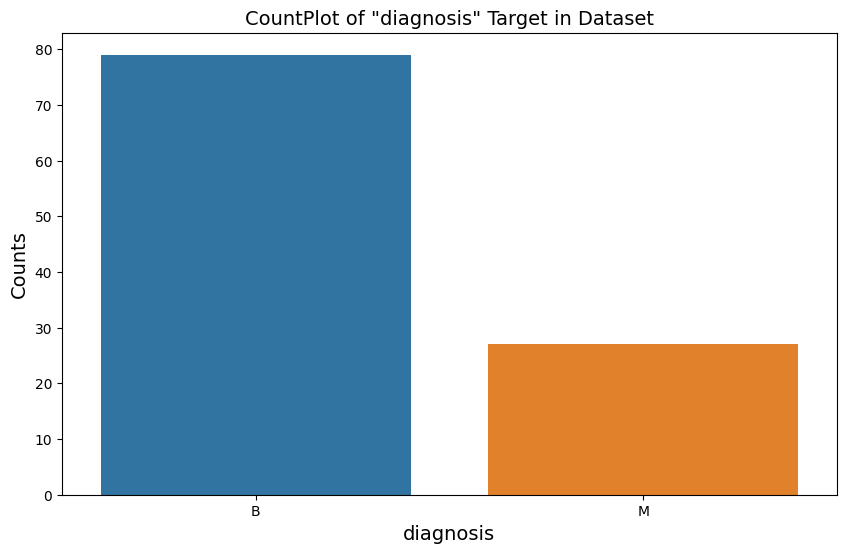

In [263]:
diagnosis_values = df_test['diagnosis'].value_counts()
print('categories of (diagnosis) --- \n', diagnosis_values)
print('**'*100)

plt.figure(figsize=(10, 6))
sns.countplot(x=df_test['diagnosis'], data= df_test, order = diagnosis_values.index)
plt.title('CountPlot of "diagnosis" Target in Dataset', fontsize=14, c = 'k')
plt.xlabel('diagnosis', fontsize = 14, c ='k')
plt.ylabel('Counts', fontsize = 14, c ='k');